<a href="https://colab.research.google.com/github/muchdefputrasholihin/model-inceptionV3-machine-learning/blob/main/Salinan_dari_tugas_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile  #bekerja dengan file ZIP, yang merupakan format kompresi file. Anda bisa membuka, membuat, membaca, menulis, dan mengekstrak file ZIP dengan library ini.
import os        #menyediakan fungsi untuk berinteraksi dengan sistem operasi. Misalnya, Anda bisa mengelola file dan direktori (membuat, menghapus, mengganti nama, dll.), serta mendapatkan informasi tentang lingkungan operasi.
import PIL      #Python Imaging Library) dan PIL.Image, PIL.ImageOps:
import numpy as np
import tensorflow as tf
import shutil
from PIL import Image, ImageOps

In [ ]:
# Install Kaggle API client
!pip install -q kaggle

# Buat direktori .kaggle jika belum ada
!mkdir -p ~/.kaggle

# Pindahkan file kaggle.json ke direktori .kaggle
!cp kaggle.json ~/.kaggle/

# Ubah izin file kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset dari Kaggle
!kaggle datasets download -d drgfreeman/rockpaperscissors

# Ekstrak file zip yang telah diunduh
!unzip -q rockpaperscissors.zip -d dataset_raw




cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0
 93% 283M/306M [00:03<00:00, 74.2MB/s]
100% 306M/306M [00:03<00:00, 90.5MB/s]


In [ ]:
import os

# Memastikan bahwa direktori 'dataset_raw' ada
dataset_dir = 'dataset_raw'

if not os.path.exists(dataset_dir):
    os.mkdir(dataset_dir)
else:
    print(f"Folder '{dataset_dir}' sudah ada.")


In [ ]:
target_file = 'rockpaperscissors.zip'

extracting = zipfile.ZipFile(target_file, 'r')

extracting.extractall(dataset_dir)

extracting.close()

In [ ]:
# Menggabungkan dataset_dir dengan subdirektori 'rps-cv-images'
dataset_dir = os.path.join(dataset_dir, 'rps-cv-images')
# dataset_raw/rps-cv-images

NameError: name 'os' is not defined

In [ ]:

classdir_list = ['paper', 'rock', 'scissors']

In [ ]:
# Menentukan persentase data untuk pelatihan
training_percentage = 0.9

In [ ]:
# Menentukan nama direktori untuk data pelatihan dan validasi
training_dataset_dir = 'training'
validation_dataset_dir = 'validation'

In [ ]:
# Membuat direktori 'training' jika belum ada
os.mkdir(training_dataset_dir)
os.mkdir(validation_dataset_dir)

In [ ]:
for dirname in classdir_list:
  classpath = os.path.join(dataset_dir, dirname)
  # dataset_raw/rps-cv-images/scissors

  counter = 0
  training_length = training_percentage * len(os.listdir(classpath))

  training_classpath = os.path.join(training_dataset_dir, dirname)
  # training/paper
  validation_classpath = os.path.join(validation_dataset_dir, dirname)       #Membentuk path untuk direktori pelatihan dan validasi:

  os.mkdir(training_classpath)                  #Membuat subdirektori untuk pelatihan dan validasi ini dilakukakan semua kelas
  os.mkdir(validation_classpath)

#looping melalui setiap file
  for filename in os.listdir(classpath):
    filepath = os.path.join(classpath, filename)
    if counter < training_length:
      shutil.move(filepath, training_classpath)
    else:
      shutil.move(filepath, validation_classpath)

    counter += 1

training/
├── paper/
│   ├── file1.jpg
│   ├── file2.jpg
│   └── ...
├── rock/
│   ├── file1.jpg
│   ├── file2.jpg
│   └── ...
└── scissors/
    ├── file1.jpg
    ├── file2.jpg
    └── ...

validation/
├── paper/
│   ├── file1.jpg
│   ├── file2.jpg
│   └── ...
├── rock/
│   ├── file1.jpg
│   ├── file2.jpg
│   └── ...
└── scissors/
    ├── file1.jpg
    ├── file2.jpg
    └── ...

In [ ]:
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale = 1./255,      # Menormalkan nilai piksel ke rentang [0, 1]
    zoom_range = 0.25,      # # Memperbesar atau memperkecil gambar secara acak hingga 25%
    horizontal_flip = True, ## Melakukan flip gambar secara horizontal secara acak
    vertical_flip = True         #Melakukan flip gambar secara vertikal secara acak
)
# untuk data validasi
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale = 1./255      ## Menormalkan nilai piksel ke rentang [0, 1]
)

In [ ]:
# Membuat generator untuk data pelatihan dengan augmentasi data
training_generator = training_datagen.flow_from_directory(
    training_dataset_dir,
    target_size = (150, 150),      # Mengubah setiap gambar menjadi ukuran 150x150 piksel
    class_mode = 'categorical'    # Mode kelas untuk tugas klasifikasi multi-kelas
)


validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_dir,      # Direktori tempat data validasi disimpan
    target_size = (150, 150),
    class_mode = 'categorical'
)

Found 1970 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


Mempertahankan Pembelajaran Sebelumnya: Dengan mengunci (freezing) layer-layer pralatih,
Mengurangi Waktu Pelatihan:
#  Mencegah Overfitting: Dengan membatasi pembaruan bobot pada bagian bawah model, Anda dapat mencegah model dari overfitting terhadap dataset kecil yang mungkin Anda miliki untuk tugas spesifik Anda.

In [ ]:
from tensorflow.keras.applications import InceptionV3

# Inisialisasi model InceptionV3 tanpa layer teratas, menggunakan bobot dari ImageNet, dan mengatur bentuk input
inception = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(150, 150, 3)      # tinggi fiksel lebar fiksel       3 =  gambar warna RSG red green and blue     # Menentukan bentuk input yang diharapkan oleh model
)

# Mengatur semua layer dalam model InceptionV3 menjadi non-trainable
for layer in inception.layers:
    layer.trainable = False

# Menampilkan indeks, nama kelas, dan status trainable dari setiap layer dalam model InceptionV3
for i, layer in enumerate(inception.layers):
    print(f"{i} {layer.__class__.__name__} {layer.trainable}")


87910968/87910968 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D, BatchNormalization, Flatten, GlobalAveragePooling2D
from keras import regularizers

def lw(bottom_model, num_classes):
    top_model = bottom_model.output        # Mengambil output dari model yang sudah ada (bottom_model)
    top_model = GlobalAveragePooling2D()(top_model)         # Global Average Pooling untuk meratakan output menjadi vektor
    top_model = Dense(1024, activation='relu')(top_model)    # Menambahkan Dense layer dengan 1024 unit neuron dan aktivasi ReLU
    top_model = Dense(512, activation='relu')(top_model)     # Menambahkan Dense layer dengan 512 unit neuron dan aktivasi ReLU
    top_model = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)            # Menambahkan Dense layer untuk output klasifikasi dengan aktivasi softmax
    return top_model


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D


from keras.models import Model

# Jumlah kelas yang akan diprediksi
num_classes = 3
top_model = lw(inception, num_classes)      # Memanggil fungsi lw untuk menambahkan lapisan-lapisan klasifikasi di atas model InceptionV3
model = Model(inputs=inception.input, outputs=top_model)    # Membuat model utama dengan menyatukan InceptionV3 dan top_model

print(model.summary())            # Menampilkan ringkasan arsitektur dari model yang telah dibuat

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

Adam" (Adaptive Moment Estimation)
 adam = Kecepatan Konvergensi, Stabilitas:


In [ ]:
# Mengompilasi model dengan konfigurasi optimizer, loss function, dan metrics
model.compile(optimizer='adam', loss ='categorical_crossentropy',metrics=['accuracy'])     # Optimizer untuk menyesuaikan bobot model,  # Fungsi kerugian untuk mengevaluasi performa model,# Metrik untuk mengukur akurasi prediksi model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

 # Menggunakan EarlyStopping untuk menghentikan pelatihan jika val_loss tidak berkurang setelah 3 epoch
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Melatih model dengan generator data training dan data validasi
history = model.fit(
    training_generator,           # Data generator untuk training
    epochs=10,  # Atau jumlah epoch yang lebih besar
    validation_data=validation_generator,      # Data generator untuk validasi
    verbose=1,                      # verbositas selama pelatihan. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    initial_epoch=0,               #  Epoch awal yang akan dimulai pelatihan
    callbacks=[early_stopping]      # Menggunakan EarlyStopping untuk menghentikan pelatihan jika kondisi yang ditentukan terpenuhi
)


Epoch 1/10
62/62 [==============================] - 115s 2s/step - loss: 0.2359 - accuracy: 0.9838 - val_loss: 0.1838 - val_accuracy: 0.9954
Epoch 2/10
62/62 [==============================] - 114s 2s/step - loss: 0.2088 - accuracy: 0.9772 - val_loss: 0.1590 - val_accuracy: 0.9862
Epoch 3/10
62/62 [==============================] - 112s 2s/step - loss: 0.1825 - accuracy: 0.9787 - val_loss: 0.1499 - val_accuracy: 0.9862
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.1310 - accuracy: 0.9893

KeyboardInterrupt: 

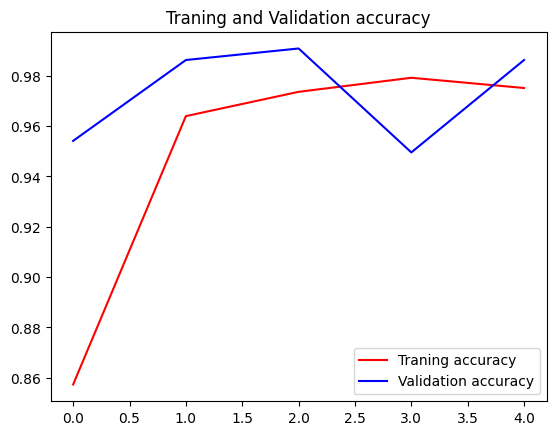

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Traning accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Traning and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

